In [ ]:
api_key = ''

api_secret_key = ''

access_key =  ''

access_secret = ''

# JSC270 Lab 7: The Twitter API

__Note: Since it takes a day or two for you to obtain API credentials from Twitter, you will not be able to follow along in this notebook unless you have signed up for an account.  This part of the lab will be a demo.__

- I ask that you __please do not run any cells of this notebook until you have obtained your own credentials, and substituted them above__. I ask this because Twitter has systems in place to identify bots based on API queries. If we all suddenly used my credentials, it would be potentially an anomalous 25x increase in the query volume on my account (it may appear as though I'd been hacked). 

- I don't use twitter personally, but if you do, and you're using your personal account, you'll want to keep the information in the first cell secret. One way of doing this would be to store the keys in a local csv file, then read them in using `pd.read_csv` instead of declaring them openly.

- To run this notebook, please make sure you have done the following:

1. You'll need to sign up for a Twitter Account. Even if you already use Twitter, I recommend creating a separate account for this project.

2. You'll need to apply to be a Twitter developer. To do so, visit https://developer.twitter.com/en/apps and click the `Apply` button in the top right corner. You can choose the `Academic` -> `Student` option. The default is to sign up for a team account. This allows multiple users (ie. your and your project partner).  You can answer No to the "Will you make Twitter content or derived information available to a government entity or a government affiliated entity?".

3. You will be sent an email to confirm your account. Click the link in the email to confirm. 

4. Next, you will need to create a new app. Going back to the site listed above (assuming you're signed in to your account), you can create a new application on the developer dashboard (select `create project`). When you do this, Twitter will automatically generate 3 key pieces of 
information for your project:

        i) A Consumer API Key
        ii) A Consumer API Secret Key
        iii) A Bearer Token


Record this information somewhere secure. We'll use it to connect to Twitter through `tweepy`. Note that the developer dashboard will only show you these 3 pieces of information once. For security, if you ever want to view them again, Twitter will generate new ones for you.  I recommend a csv file that includes this information and the info you'll get in step 7.

5. After completing these steps, you have Essential Acess.  You will need to apply for Elevated Access by clicking the `View products' link in your dashboard.  See the image in the cell below.

6.  Click `Apply for Elevated`.  You will then be directed to an application.  The application will ask questions about the nature of your research project. Be honest and thorough (ie. you are completing a natural language processing project for a data science course). Note that you will not be required to `display aggregate twitter data outside of twitter`, so you can select NO for this option. After agreeing to terms and conditions, you'll submit your application. After verifying your email (check your inbox), Twitter typically takes a day or two to review and approve your developer status.


7. You can obtain the Access Token and Secret under the `Keys and Tokens` tab in the app that you created.  Again, make sure to save these somewhere!  I recommend a csv file that includes this information and the info from the previous step.  

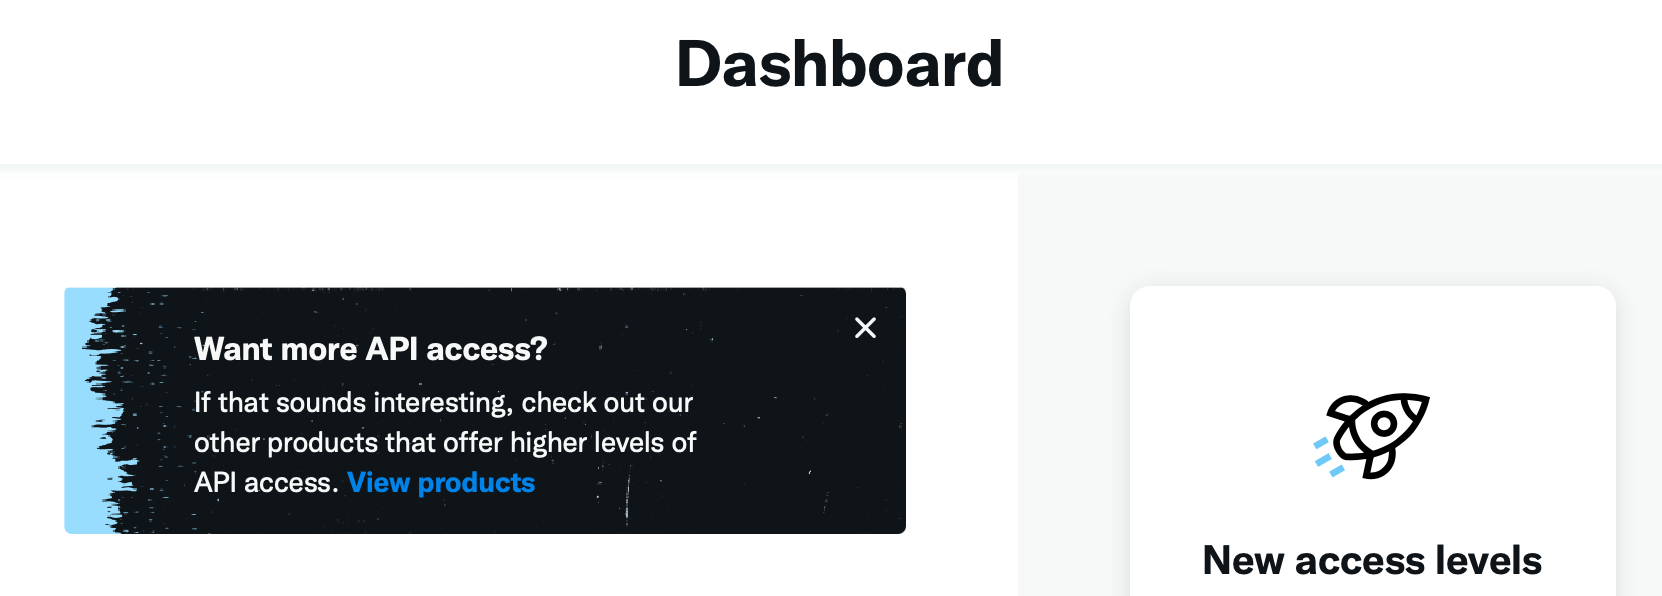

__When the above steps are done, you're ready to begin using python__. 

## What is the Twitter API?

- Twitter's Application Program Interface (API) allows approved developers to interact with twitter's user and content databases. It allows you to perform certain large-scale operations via computer, such as:
    - Posting tweets
    - Retweeting existing tweets
    - Extracting user information
    - Extracting tweets themselves
    - Computing User-related statistics
    - And more...

For our purposes, all we care about is extracting the tweets, and possibly some other related features. 

## What is Tweepy?

The python wrapper for Twitter's API is called `tweepy`. The standard(free) version allows you to extract tweets from up to 7 days ago, with a limit of 18,000 tweets in a 15 minute window. We can import this like any other python library. Below this is the code to initiate access.


In [ ]:
import tweepy as tw

# Use credentials to authorize access
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

- The api allows you to specify certain search parameters like the following:

In [ ]:
search_words = '#covid'
date_since = "2022-03-04"

#Collect tweets (here, I get only 20)
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(20)

In [ ]:
# The result is an iterable
for tweet in tweets:
  print(tweet.text)

# Could also use a list comprehension

Note that the `tweets` object is actually a Cursor object (contains JSON formatted data). To get the tweets, we use the `text` method.

- Notice that there are duplicates. Some of these exist because, by default, we are given retweets.
- However, we can filter those out before hand (unless part of your analysis is based on retweets?)

In [ ]:
# We can add filters to our search words 
search_with_filter = search_words + " -filter:retweets"

tweets = tw.Cursor(api.search,
                       q=search_with_filter,
                       lang="en",
                       since=date_since,
                       result_type = 'recent').items(20)
# Could also specify popular

[tweet.text for tweet in tweets]

There are other ways to refine your search:

In [ ]:
# I could search in various ways

# Sent before yesterday
before_yesterday = "2021-03-09"

# Contains both here and there
multi_search = "here there" 

# Contains here or there (or both)
or_search = "here OR there"

# Contains here but not there
not_search = "here -there" 

# Mentions a specific account
acct_search = "@NASA"

# Responds to/ sent from  a specific account
resp_acct_search = "to:NASA"
sent_from_search = "from:NASA"

# Search by location (you specify these values)
# For example, 1 mile from downtown toronto
geo_search = "latitude,longitude,radius"

# I'm restricting just for the sake of output
tweets = tw.Cursor(api.search,
                       q=sent_from_search,
                       lang="en",
                       since=date_since).items(10)

a = [tweet.text for tweet in tweets]
print(*a)

For other, more advanced search parameters, you can visit the API documentation [here](https://developer.twitter.com/en/docs/twitter-api/v1/rules-and-filtering/search-operators).

Additionally, notice that the text method includes more than the tweet itself. You can extract handles and key words using regex. First, let's convert what we have into a pandas DF.

In [ ]:
import pandas as pd

# tweet_list = [tweet.text for tweet in tweets]
tweet_text = pd.DataFrame(a, columns = ['tweet'])

print(tweet_text.head(5))

In [ ]:
# Extract handles 
handle_regex = '@[A-Za-z|0-9]+'

tweet_text['handles'] = tweet_text['tweet'].str.findall(handle_regex) 
print(tweet_text.head(10))


I recommend you read the twitter API documentation before or during your extraction (see link above).

<br>

<br>

# __QUESTIONS__?